Power state :  0 Action taken :  0 Earned reward :  0
Power state :  1 Action taken :  0 Earned reward :  0
Power state :  0 Action taken :  1 Earned reward :  0
Power state :  0 Action taken :  0 Earned reward :  0
Power state :  1 Action taken :  0 Earned reward :  0
Power state :  0 Action taken :  1 Earned reward :  0
Power state :  0 Action taken :  1 Earned reward :  0
Power state :  0 Action taken :  0 Earned reward :  0
Power state :  1 Action taken :  0 Earned reward :  0
Power state :  0 Action taken :  1 Earned reward :  0
Number of episodes tried 1 Rewards for this episode 0
Q(0,0): 0.0000000
Q(0,1): 0.0000000
Q(1,0): 0.0000000
Q(1,1): 0.0000000
Power state :  0 Action taken :  0 Earned reward :  0
Power state :  1 Action taken :  0 Earned reward :  0
Power state :  0 Action taken :  1 Earned reward :  0
Power state :  0 Action taken :  1 Earned reward :  0
Power state :  0 Action taken :  0 Earned reward :  0
Power state :  1 Action taken :  0 Earned reward :  0
Power stat

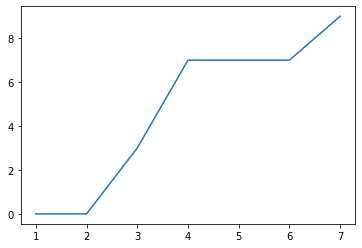

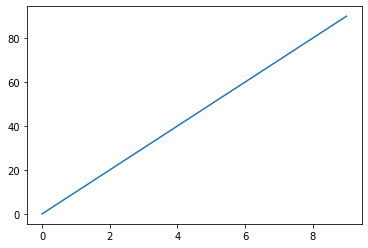

In [3]:
import matplotlib.pyplot as plt
import numpy as np
reward_per_episode = []

random_number_generator = np.random.RandomState(9) # To ensure reproducibility
number_of_steps_in_trial = 10
maximum_trial_episodes = 100
finish_by_one_episode = 9 # Stop when you reach the maximum reward in one episode
Q_table = np.array([[0.0, 0.0],[0.0, 0.0]]) # Set to 0.0 because  do not want to be int

state_transition_diagram = {0:{},1:{}} # Python 2D dictionary
# When the action is 0 (press the power button) in the power state 0 (off), the state changes to the power state 1 (on) and the reward is 0
state_transition_diagram[0][0]=[1,0]; 
# When the action is 1 (press the feed button) in the power state 0 (off), the reward is 0 in the power state 0 (off)
state_transition_diagram[0][1]=[0,0]; # 
# When the action is 0 (press the power button) in the power state 1 (ON), transition to the power state 0 (OFF) and reward 0
state_transition_diagram[1][0]=[0,0]; # 
# When power 1 (on) and action 1 (press feed button), reward 1 with power 1 (on)
state_transition_diagram[1][1]=[1,1]; # 

def display_Q_table(Q_table):
    number_of_rows = Q_table.shape[0]
    number_of_columns = Q_table.shape[1]    
    for row in range(number_of_rows):
        for column in range(number_of_columns):
            print("Q(%d,%d): %.7f" % (row,column,Q_table[row][column]))

def choose_action_highest_Q_value_from_Q_table(Q_table,this_power_state):
    maximum_value = np.max(Q_table[this_power_state])
    location_of_maximum_value = []
    for i in range(len(Q_table[this_power_state])):
        if maximum_value == Q_table[this_power_state][i]:
            location_of_maximum_value.append(i)
    return location_of_maximum_value
            
def next_action_determined_by_ε_greedy_method(this_power_state, episodes_number_tried):
    # Here is an improved version of the ε Greedy method
    selectivity_of_random_action_ε = 0.5*(1/(episodes_number_tried+1)) # The more trials, the easier it is to choose the best behavior
    random_number_0_to_1 = random_number_generator.uniform(0, 1)    
    if selectivity_of_random_action_ε <= random_number_0_to_1: # If the random number is greater than ε,choose the action with the highest Q value from the Q table
        choosed_action = choose_action_highest_Q_value_from_Q_table(Q_table,this_power_state)        
        next_action = random_number_generator.choice(choosed_action) # There can be multiple actions with the maximum Q value, so at that time, random from multiple        
    else: # If the value of the random number is smaller than epsilon, select "next_action" randomly without looking at the Q table
        next_action = random_number_generator.choice([0, 1]) # 0 or 1        
    return next_action

def update_Q_table(Q_table, power_state, action, reward, next_power_state):
    reduction_rate_γ = 0.9
    learning_rate_α = 0.5
    next_maxQ=max(Q_table[next_power_state])
    Q_table[power_state,action] = (1-learning_rate_α)*Q_table[power_state,action]+learning_rate_α*(reward+reduction_rate_γ*next_maxQ)
    return Q_table

##### Main processing #####
for trial_episode_number in range(maximum_trial_episodes): # If the maximum is 100, range is 0 to 99
    power_state = 0
    this_episode_reward = 0
 
    for step in range(number_of_steps_in_trial):  # Repetition in trial
        action = next_action_determined_by_ε_greedy_method(power_state, trial_episode_number) 
        next_power_state, reward = state_transition_diagram[power_state][action]
        print("Power state : ",power_state,"Action taken : ", action, "Earned reward : ",reward)
        this_episode_reward = this_episode_reward + reward  # Add  reward  earned
        Q_table = update_Q_table(Q_table, power_state, action, reward, next_power_state)
        power_state = next_power_state

    print('Number of episodes tried',trial_episode_number+1,'Rewards for this episode',this_episode_reward)  
    reward_per_episode.append(this_episode_reward)
    display_Q_table(Q_table)
    if this_episode_reward >= finish_by_one_episode:
        break

x = np.arange(1,8,1)
print('Y = ', x)
print('Reward per episode', reward_per_episode)
ix1 = len(reward_per_episode)

plt.plot(x,reward_per_episode)
plt.show()     

x = np.arange(0,10,1)
y = np.arange(0,100,10)
plt.plot(x,y)
plt.show()
